In [1]:
import pandas as pd

df = pd.read_csv('../data/train.csv')
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [2]:
df['date'] = pd.to_datetime(df['date'])


In [3]:
daily_sales = df.groupby('date')['sales'].sum().reset_index()
daily_sales.head()

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


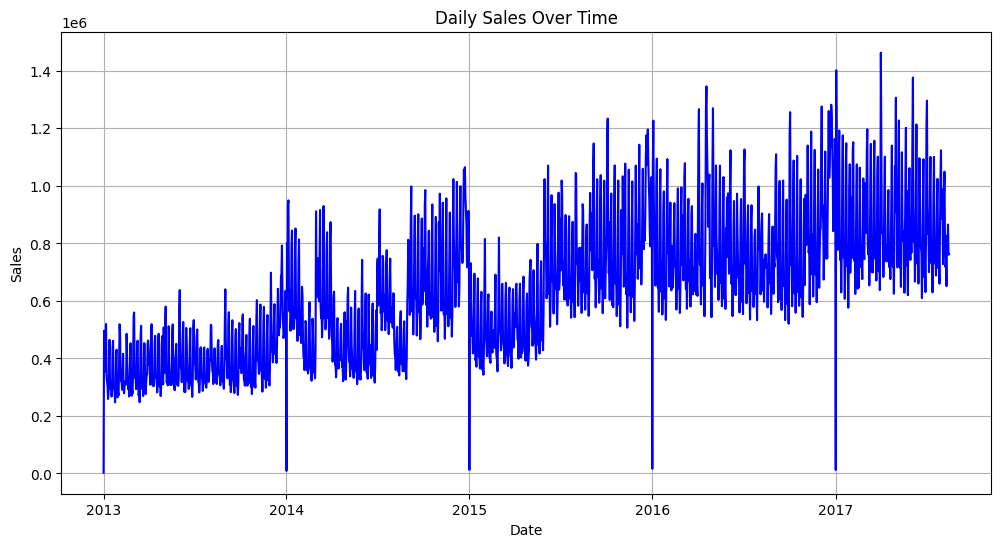

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(daily_sales['date'], daily_sales['sales'], color='blue')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [5]:
from prophet import Prophet

df_prophet = daily_sales.rename(columns={'date': 'ds', 'sales': 'y'})
df_prophet.head()


,ds,y
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


In [6]:
!pip install plotly


In [7]:
from prophet import Prophet

# Rename columns for Prophet
df_prophet = daily_sales.rename(columns={'date': 'ds', 'sales': 'y'})
df_prophet.head()


,ds,y
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


In [8]:
model = Prophet()
model.fit(df_prophet)


13:57:50 - cmdstanpy - INFO - Chain [1] start processing
13:57:50 - cmdstanpy - INFO - Chain [1] done processing


In [9]:

future = model.make_future_dataframe(periods=90)
future.tail()


,ds
1769,2017-11-09
1770,2017-11-10
1771,2017-11-11
1772,2017-11-12
1773,2017-11-13


In [10]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1769,2017-11-09,7.993716e+05,660503.340507,9.386414e+05
1770,2017-11-10,8.750810e+05,732515.920267,1.018885e+06
1771,2017-11-11,1.066603e+06,937032.980989,1.211621e+06
1772,2017-11-12,1.120899e+06,977232.149294,1.270289e+06
1773,2017-11-13,9.109170e+05,772113.915563,1.044729e+06


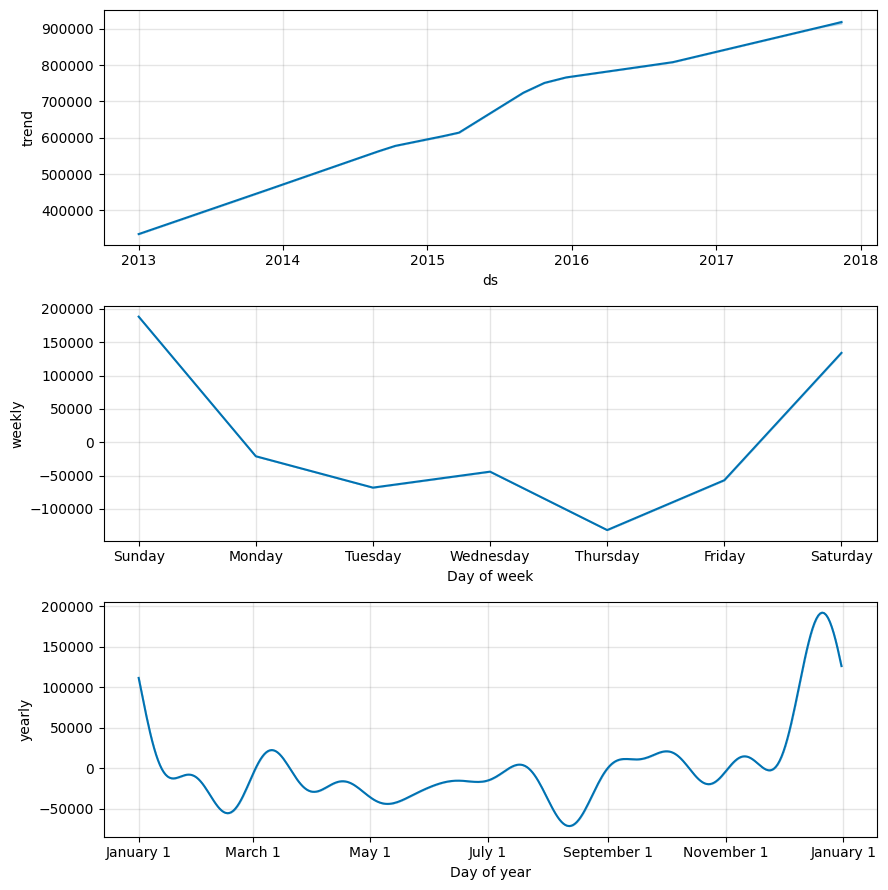

In [11]:
model.plot_components(forecast);


In [12]:
import os

# Ensure reports directory exists
os.makedirs('../reports', exist_ok=True)

# Save forecast to CSV
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('../reports/forecast.csv', index=False)

print("✅ Forecast saved to reports/forecast.csv")


✅ Forecast saved to reports/forecast.csv


In [13]:
import joblib
os.makedirs('../models', exist_ok=True)

# Save the Prophet model
joblib.dump(model, '../models/prophet_model.pkl')

print("✅ Model saved to models/prophet_model.pkl")


✅ Model saved to models/prophet_model.pkl


In [14]:
!pip install joblib



In [ ]:
import joblib
os.makedirs('../models', exist_ok=True)

joblib.dump(model, '../models/prophet_model.pkl')
print("✅ Model saved to models/prophet_model.pkl")
